## Data Info:
The following describes the dataset columns:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

# 1. Problem Definition & Business Context  
* **Objective**: Predict median house value (MEDV) in the Boston area from neighbourhood features.  
* **Business context / why it matters**:  
  - Real-estate valuation, risk assessment for mortgage lenders, investment decisions.  
  - Insights for policy makers: how neighbourhood features affect housing value.  
* **Key questions**:  
  - Which features most strongly influence house value?  
  - How accurate can our model be?  
  - Are there biases or fairness/ethics considerations in the data?

## 2. Data Acquisition & Exploratory Data Analysis (EDA)  
### 2.1 Data Loading  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Boston Housing dataset from CSV
df = pd.read_csv('https://gist.githubusercontent.com/nnbphuong/def91b5553736764e8e08f6255390f37/raw/373a856a3c9c1119e34b344de9230ae2ea89569d/BostonHousing.csv')
display(df)
display(f"\nColumns: {df.columns.tolist()}")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


"\nColumns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV']"

### 2.2 Data Description & Summary
* Display `df.head()`, `df.info()`, `df.describe()`.
* Check missing values, data types.
* Visualise distributions: histograms for each feature, boxplots for outliers.

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


None

In [6]:
display(df.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [7]:
#checking missing values:
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

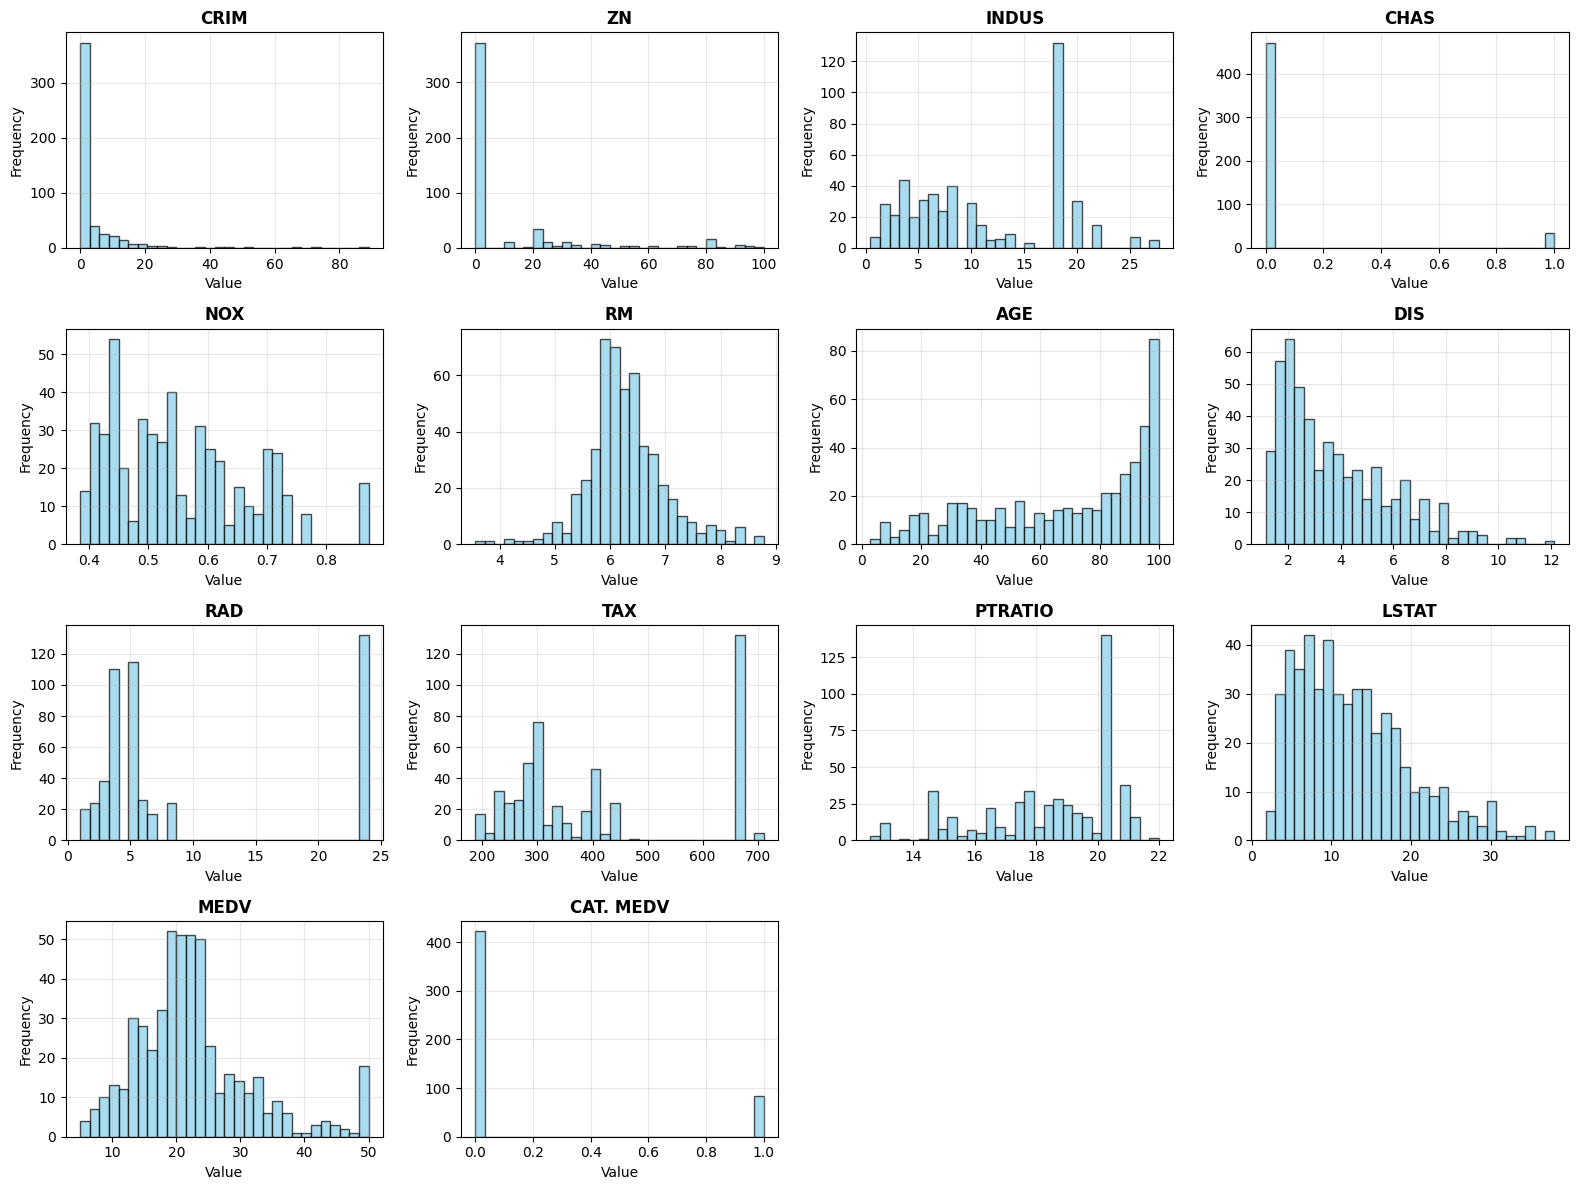

In [12]:
# Visualize distributions: histograms for each feature
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col}', fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(alpha=0.3)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


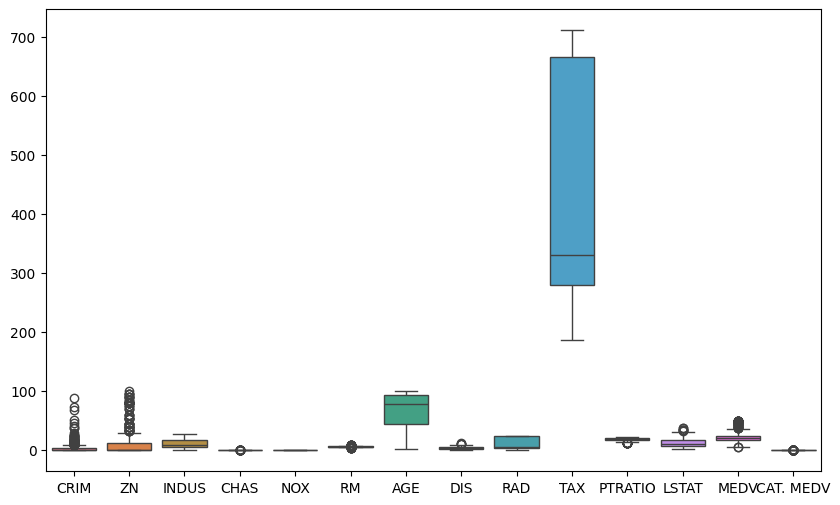

In [9]:
# visualize boxplot:
plt.subplots(figsize=(10,6))
sns.boxplot(df, orient='v')
plt.show()

### 2.3 Feature Relationships & Correlations

* Pairwise scatter plots (e.g., RM vs MEDV, LSTAT vs MEDV).
* Correlation matrix & heatmap.
* Identify multicollinearity (e.g., VIF scores) if needed.

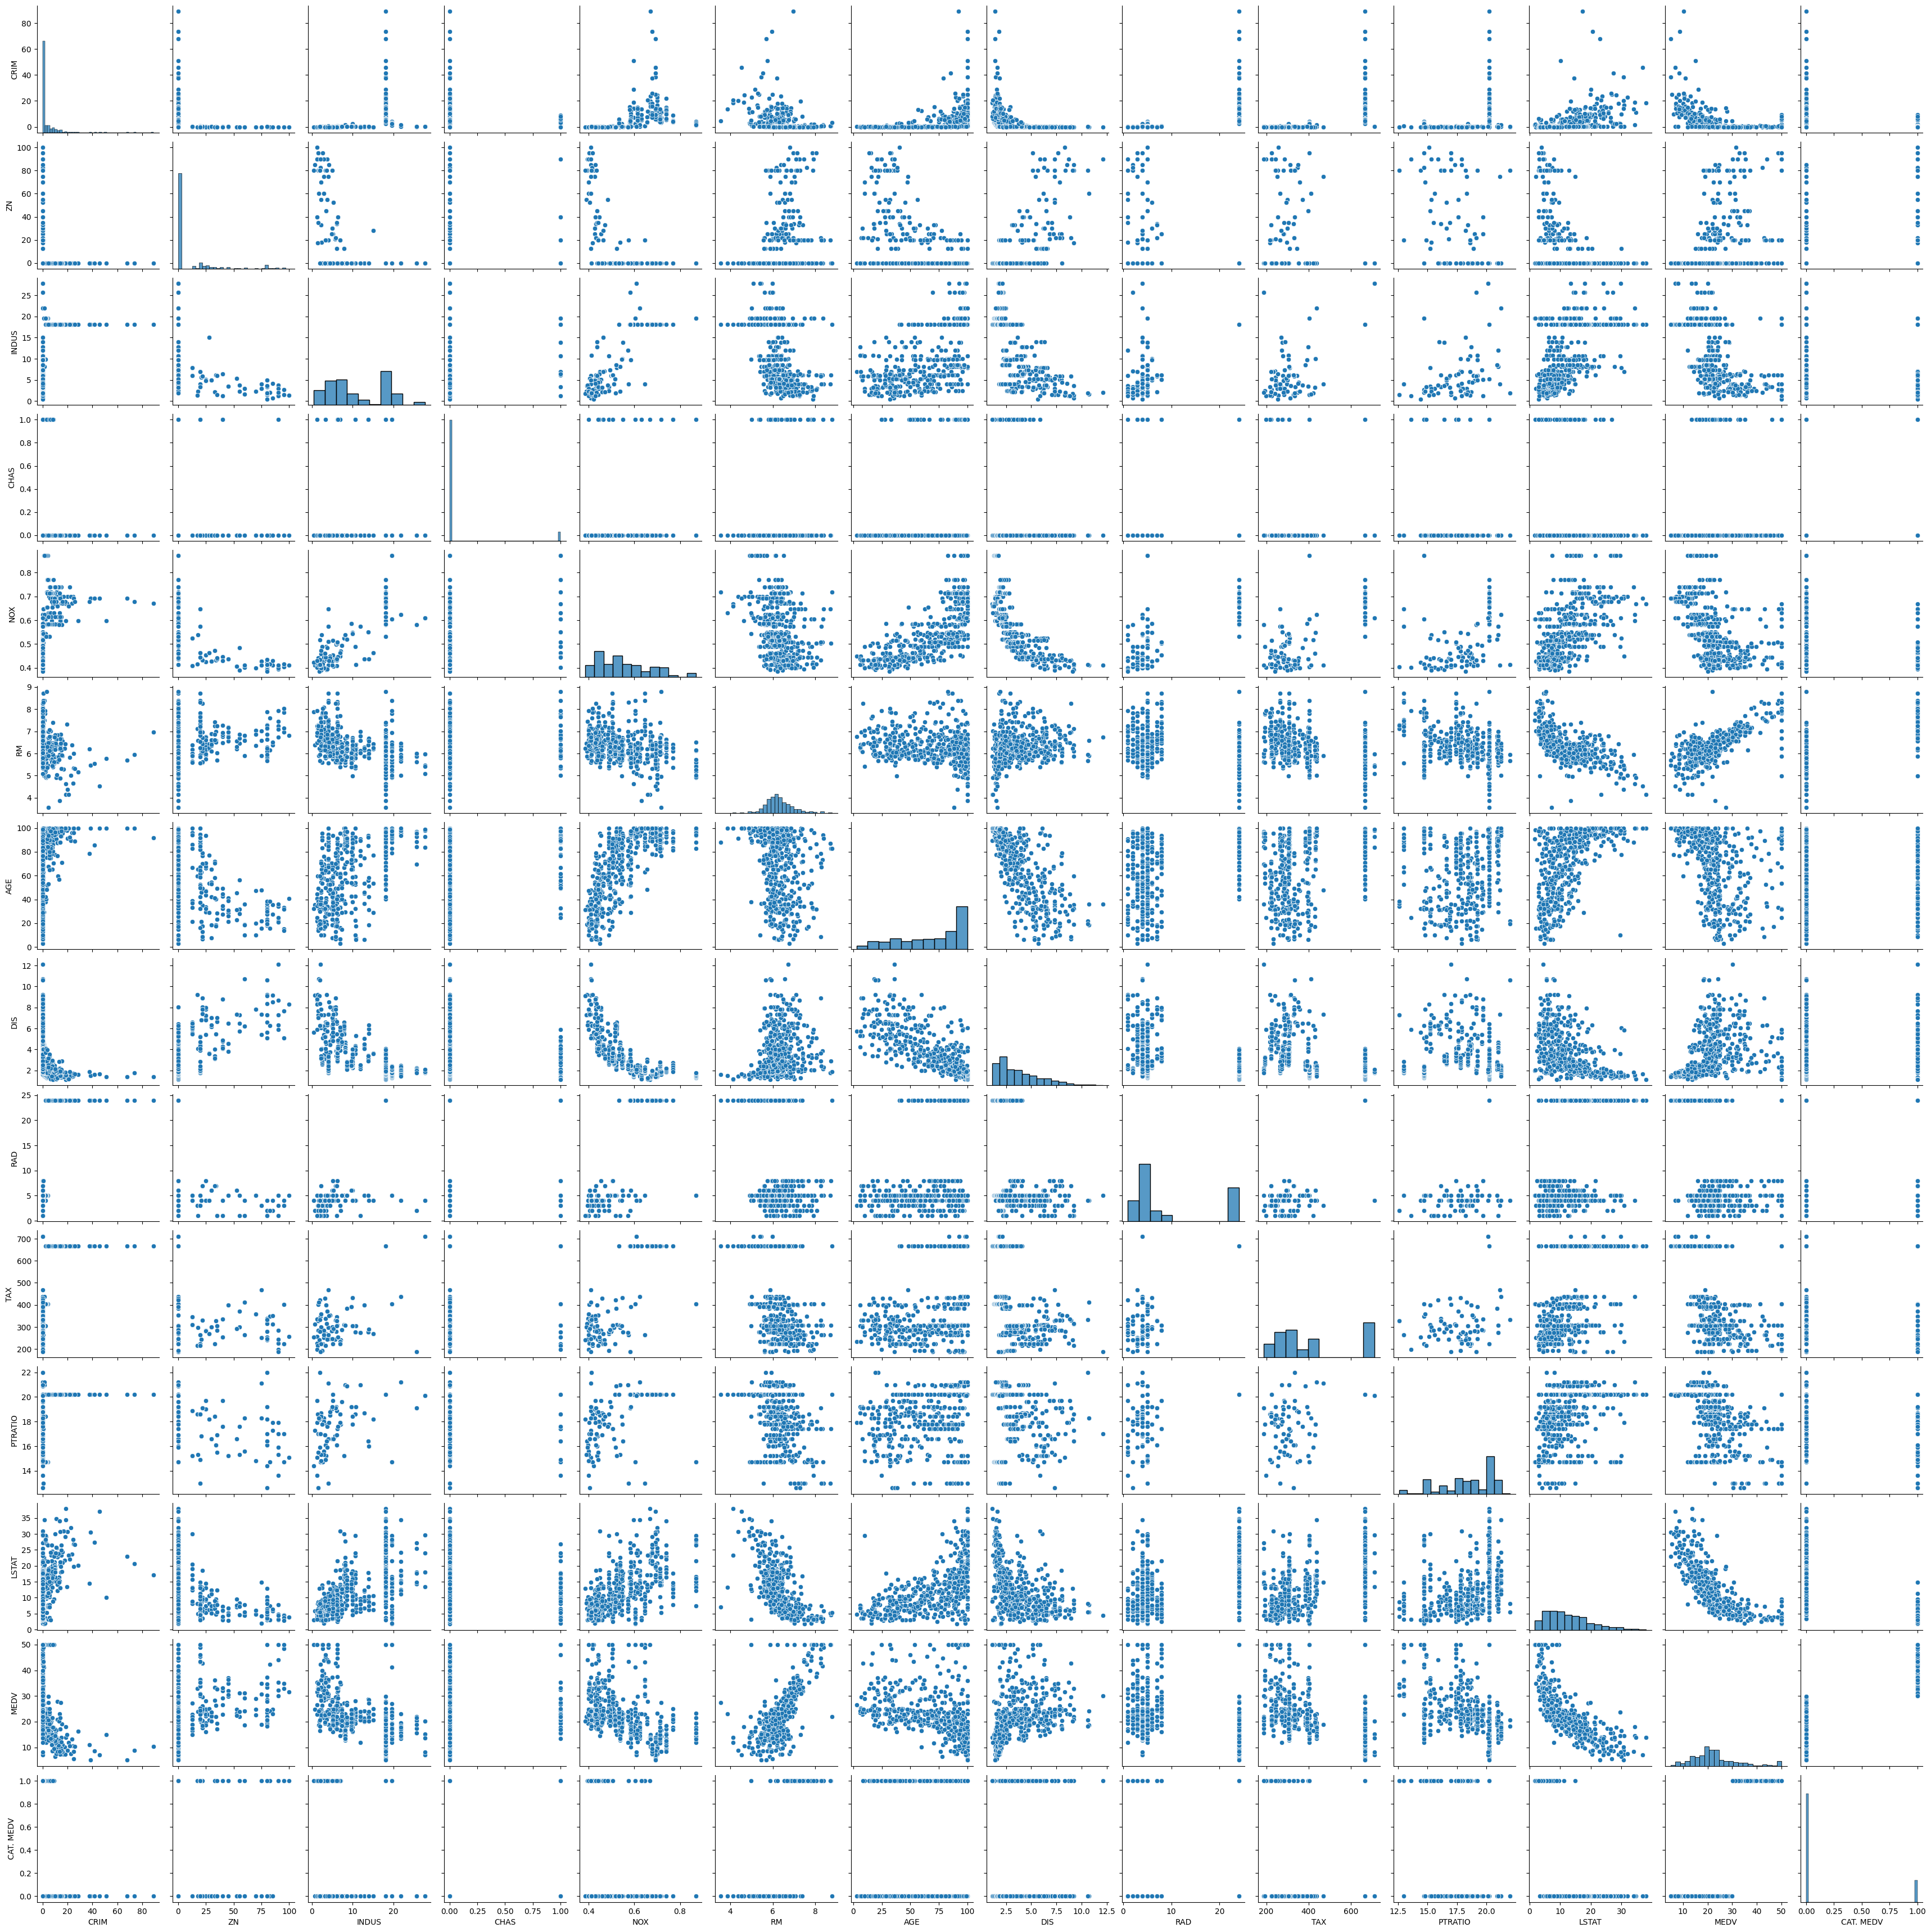

In [10]:
sns.pairplot(df,hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

## 2.4 Outlier & Skew Analysis

* Box plots or IQR method to detect outliers.
* Check skew for continuous features; consider log-transformations.

### 2.5 Initial Observations

* Summary of key findings from EDA: e.g., “Rooms (RM) shows strong positive relation with MEDV”, “LSTAT has a strong negative correlation”, etc.
* Possible dataset limitations: age, region specificity, fairness issues.

## 3. Data Pre-processing & Feature Engineering

### 3.1 Handling Missing Values & Outliers

* Code to handle any missing values (if found).
* Decide outlier treatment: e.g., cap values or drop extreme entries.

## 3.2 Transformations & Scaling

* Apply log transform to skewed features (if appropriate).
* Scale features using `StandardScaler` or `MinMaxScaler`.

### 3.3 Feature Engineering

* Create new features or combinations (e.g., `ROOMS_PER_PERSON`, `AGE_BUCKET`, or ratio features).
* Possibly drop or transform features with questionable meaning (e.g., features heavily based on race/ethnicity).

### 3.4 Splitting Dataset

```python
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

* Consider stratification if appropriate (though regression doesn’t use strata).
* Set aside validation set or use cross-validation later.

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Baseline Modelling

### 4.1 Linear Regression (Baseline)

```python
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
```

## 4.2 Evaluation Metrics

* Compute: MAE, RMSE, R².

```python
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
r2 = r2_score(y_test, y_pred_lr)
```

* Plot actual vs predicted values, residual plot.

## 4.3 Discussion

* How did baseline perform?
* What are residuals telling us (heteroscedasticity, bias)?
* What are next steps to improve?


## 5. Advanced Modelling & Tuning

### 5.1 Regularised Models (Ridge, Lasso)

```python
from sklearn.linear_model import Ridge, Lasso
# Example: grid search for Ridge

### 5.2 Tree-based Models (Random Forest, Gradient Boosting)

```python
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
```

### 5.3 Pipeline & Cross-Validation

```python
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
```

### 5.4 Comparison of Models

* Create table summarising each model’s performance (MAE, RMSE, R², training time).
* Visualise feature importance for tree-based model.
